In [84]:
import numpy as np
import pandas as pd


In [85]:
master_diabetic = pd.read_csv(r"D:\PG-DAI\MachineLearning\Dec 20 Decision Trees\diabetes.csv")

In [86]:
master_diabetic.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [87]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(master_diabetic.loc[:,master_diabetic.columns != 'Outcome'], master_diabetic['Outcome'], stratify=master_diabetic['Outcome'], random_state=42)

In [88]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
751,1,121,78,39,74,39.0,0.261,28
358,12,88,74,40,54,35.3,0.378,48
718,1,108,60,46,178,35.5,0.415,24
536,0,105,90,0,0,29.6,0.197,46
651,1,117,60,23,106,33.8,0.466,27
...,...,...,...,...,...,...,...,...
676,9,156,86,0,0,24.8,0.230,53
113,4,76,62,0,0,34.0,0.391,25
556,1,97,70,40,0,38.1,0.218,30
152,9,156,86,28,155,34.3,1.189,42


In [89]:
y_train.value_counts()


0    375
1    201
Name: Outcome, dtype: int64

In [90]:
y_test.value_counts()


0    125
1     67
Name: Outcome, dtype: int64

In [101]:

from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier().fit(X_train, y_train)


In [92]:
# y_test.values.reshape(-1, 1)

In [93]:
y_pred = clf.predict(X_test)

In [94]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7291666666666666


[Text(2186.1142074742265, 1576.44, 'X[1] <= 132.5\ngini = 0.454\nsamples = 576\nvalue = [375, 201]'),
 Text(1174.6942654639174, 1467.72, 'X[7] <= 30.5\ngini = 0.325\nsamples = 397\nvalue = [316, 81]'),
 Text(814.1694587628866, 1359.0, 'X[5] <= 45.4\ngini = 0.192\nsamples = 241\nvalue = [215, 26]'),
 Text(651.8389175257731, 1250.28, 'X[0] <= 7.5\ngini = 0.163\nsamples = 235\nvalue = [214, 21]'),
 Text(447.98195876288656, 1141.56, 'X[6] <= 0.509\ngini = 0.144\nsamples = 231\nvalue = [213, 18]'),
 Text(161.0721649484536, 1032.84, 'X[2] <= 19.0\ngini = 0.049\nsamples = 158\nvalue = [154, 4]'),
 Text(80.5360824742268, 924.12, 'X[1] <= 116.5\ngini = 0.278\nsamples = 6\nvalue = [5, 1]'),
 Text(40.2680412371134, 815.4, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(120.8041237113402, 815.4, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(241.6082474226804, 924.12, 'X[4] <= 37.0\ngini = 0.039\nsamples = 152\nvalue = [149, 3]'),
 Text(201.340206185567, 815.4, 'X[4] <= 34.0\ngini = 0.083\nsa

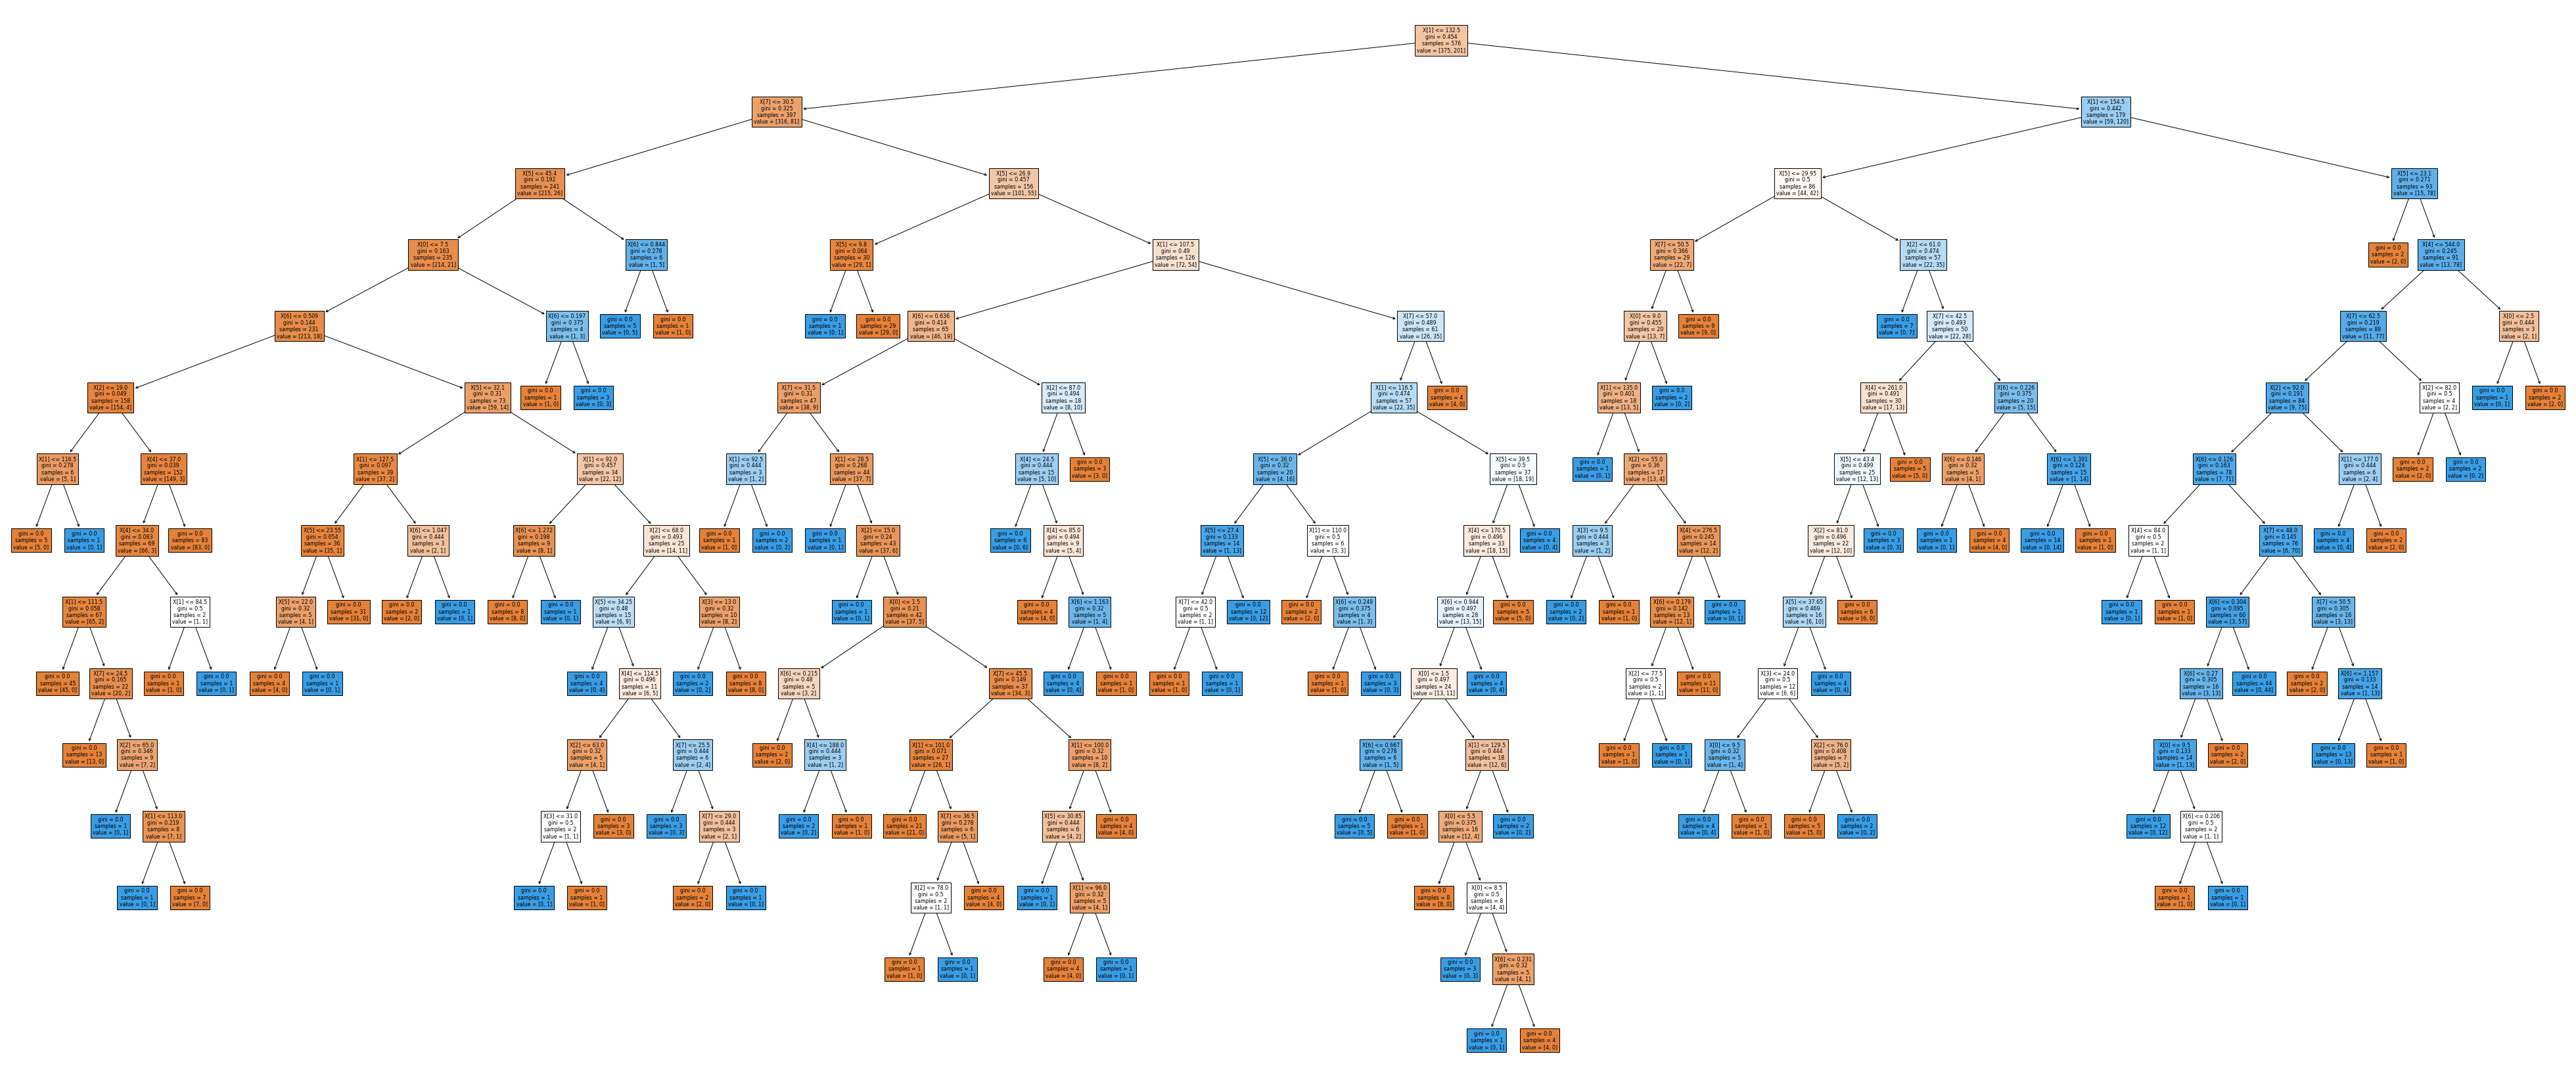

In [95]:
import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize=(70,30))
tree.plot_tree(clf,filled=True)

In [96]:
print(metrics.accuracy_score(y_test,y_pred))

0.7291666666666666


In [97]:
from sklearn.model_selection import GridSearchCV

gd= GridSearchCV(clf,{'max_depth':[3,4,5,6,7,8,9,10],'criterion':['gini','entropy']},cv=10)

In [98]:
gd.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6, 7, 8, 9, 10]})

In [99]:
gd.best_params_

{'criterion': 'gini', 'max_depth': 3}

In [100]:
gd.best_score_

0.7551119177253478